# Lab 6 - Adults

Kalyn Howes & Chloe VanCory

COSC 311

12/10/21

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
import sklearn
import shap
import copy
import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
def divideSets(p,data):
    copydata = copy.deepcopy(data)
    # print(copydata)
    np.random.shuffle(copydata)
    list1 = copydata[:int(p*len(copydata))]
    list2 = copydata[int(p*len(copydata)):]
    #print('List 1: \n', list1)
    #print('\nList 2: \n',list2)
    
    return (list1, list2)

# 2) Adults Data

In [3]:
adults = pd.read_csv('data/adult.data', header=None, skipinitialspace = True,
         names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                 'marital-status', 'occupation', 'relationship', 'race', 'sex',
                 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

adults.head(200)

age         workclass  fnlwgt     education  education-num  \
0     39         State-gov   77516     Bachelors             13   
1     50  Self-emp-not-inc   83311     Bachelors             13   
2     38           Private  215646       HS-grad              9   
3     53           Private  234721          11th              7   
4     28           Private  338409     Bachelors             13   
..   ...               ...     ...           ...            ...   
195   23           Private  197387       5th-6th              3   
196   36           Private   99374  Some-college             10   
197   40       Federal-gov   56795       Masters             14   
198   35           Private  138992       Masters             14   
199   24  Self-emp-not-inc   32921       HS-grad              9   

         marital-status         occupation    relationship   race     sex  \
0         Never-married       Adm-clerical   Not-in-family  White    Male   
1    Married-civ-spouse    Exec-managerial         Husband  White    Male   
2              Divorced  Handlers-cleaners   Not-in-family  White    Male   
3    Married-civ-spouse  Handlers-cleaners         Husband  Black    Male   
4    Married-civ-spouse     Prof-specialty            Wife  Black  Female   
..                  ...                ...             ...    ...     ...   
195  Married-civ-spouse   Transport-moving  Other-relative  White    Male   
196            Divorced       Craft-repair   Not-in-family  White    Male   
197       Never-married    Exec-managerial   Not-in-family  White  Female   
198  Married-civ-spouse     Prof-specialty  Other-relative  White    Male   
199       Never-married              Sales   Not-in-family  White    Male   

     capital-gain  capital-loss  hours-per-week native-country income  
0            2174             0              40  United-States  <=50K  
1               0             0              13  United-States  <=50K  
2               0             0              40  United-States  <=50K  
3               0             0              40  United-States  <=50K  
4               0             0              40           Cuba  <=50K  
..            ...           ...             ...            ...    ...  
195             0             0              40         Mexico  <=50K  
196             0             0              40  United-States  <=50K  
197         14084             0              55  United-States   >50K  
198          7298             0              40  United-States   >50K  
199             0             0              40  United-States  <=50K  

[200 rows x 15 columns]

#### a) Train a model from the scikit-learn library on the data 
For the adults, the decision is whether or not a person makes over $50k.

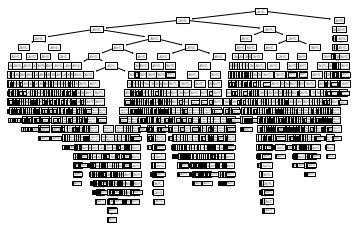

In [4]:
from sklearn import tree

x = adults[['age', 'education-num', 'capital-gain']].values
y = adults['income'].values

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
_ = tree.plot_tree(clf)

In [6]:
# testing on already classified points: 
# age: 39, ed-num: 13, capital-gain: 2174 ----> <=50K
clf.predict([[39, 13, 2174]])

array(['<=50K'], dtype=object)

100%|██████████| 19536/19536 [00:01<00:00, 13384.05it/s]



p = 0.6
Confusion Matrix: 
 [[14163   630]
 [ 2705  2038]]


<AxesSubplot:>

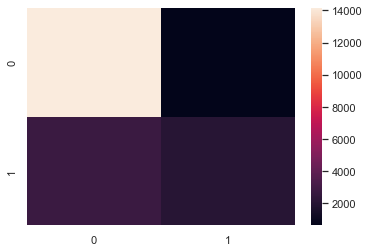

In [5]:
x = [ [adults['age'][i], adults['education-num'][i], adults['capital-gain'][i], 
       adults['income'][i]] for i in range(len(adults['income']))]

#print(x)

p = 0.6
n = len(x)
rets = divideSets(p, x)
list1 = rets[0] 
list2 = rets[1] 

# need to get the data in one array & the labels in another
data1 = [[[t[0], t[1], t[2]]] for t in list1]
labels1 = [t[3] for t in list1]
# print('\nData (List1):\n', data1)
# print('\nLabels (List1):\n', labels1)

data2 = [[[t[0], t[1], t[2]]] for t in list1]
labels2 = [t[3] for t in list1]
# print('\nData (List2):\n', data2)
# print('\nLabels (List2):\n', labels2)

predictions_labels = []
for i in tqdm.tqdm(range(len(data2))):
    predictions_labels.append(clf.predict(data2[i]))

# want predictions with their points
predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
#print(predictions)
print(f'\np = {p:1.1}')
cf = confusion_matrix(labels2, predictions_labels)
np.set_printoptions(threshold=np.inf)
print('Confusion Matrix: \n', cf)

# heat map for confusion matrix
sns.set_theme()
sns.heatmap(cf)

#### (b) Using the shap package, plot the waterfall graph of SHAP values of the features in your data. 
Do this for a couple different predictions, how do they differ for different class outputs? Try for both a correct and incorrect prediction.

In [6]:
xs = adults[['age', 'education-num', 'capital-gain']].values
ys = adults['income']
ys = ys.replace(['<=50K', '>50K'], [0,1]).values

# probably a better idea to split the data etc.
clf.fit(xs,ys)

explainer = shap.Explainer(clf.predict, xs, feature_names=['age', 'education-num', 'capital-gain'])
shap_values = explainer(xs)
#print(shap_values[0])

Exact explainer: 32562it [00:27, 839.58it/s]                            


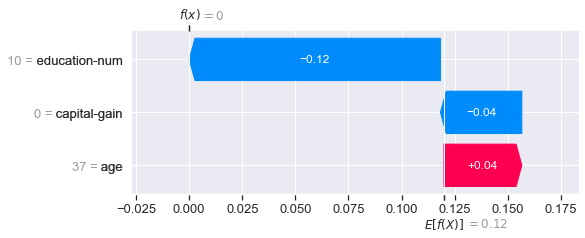

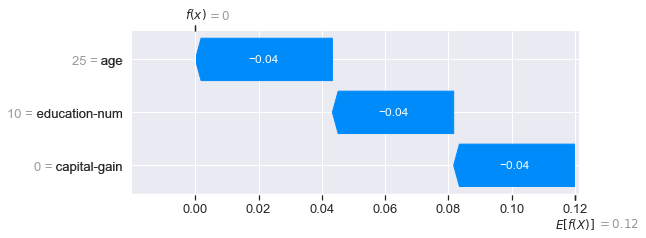

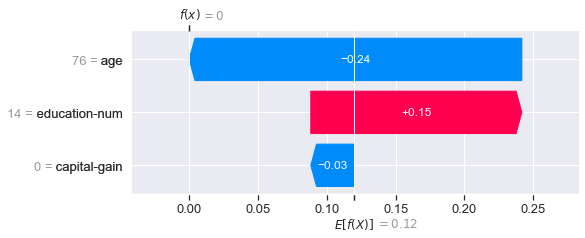

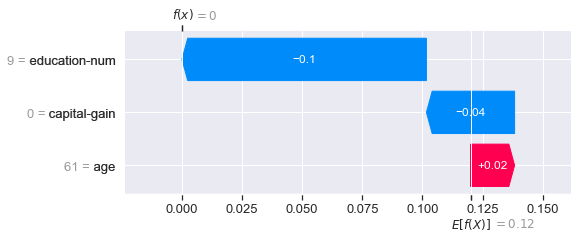

In [7]:
# check for different shap values: shap_values[1], [10] etc
shap.plots.waterfall(shap_values[10])
shap.plots.waterfall(shap_values[50])
shap.plots.waterfall(shap_values[100])
shap.plots.waterfall(shap_values[140])

I'm not sure why the features change order on the 'y-axis'. However, it looks like capital gain is the only one that stays consistently negative. The other two features seem to vary a lot.

#### (c) Try the force plot on some individual SHAP values and also the entire set of predictions. 
What do these indicate about the influence of various features in your data?

In [8]:
# individual shap values:
shap.initjs()
shap.plots.force(shap_values[50])

In [9]:
shap_values_sub = shap_values[:300] # thousands of rows was way too large for the .force
shap.plots.force(shap_values_sub)

Based on this chart, it seems the education num and capital gain have the most influence on an adults income level.

#### (d) Try the above with a second model and compare and contrast the results.
(try a new machine learning model & do it again)

If you were to use one of these in a practical setting (i.e. your job/income/business depends on it), which would you choose and why?

In [10]:
from sklearn.neural_network import MLPClassifier
x = adults[['age', 'education-num', 'capital-gain']].values
y = adults['income'].values
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf2.fit(x, y)
# testing on already classified points: 
# age: 39, ed-num: 13, capital-gain: 2174 ----> <=50K
clf2.predict([[39, 13, 2174]])

array(['<=50K'], dtype='<U5')

100%|██████████| 19536/19536 [00:01<00:00, 11844.16it/s]



p = 0.6
Confusion Matrix: 
 [[14881     0]
 [ 4655     0]]


<AxesSubplot:>

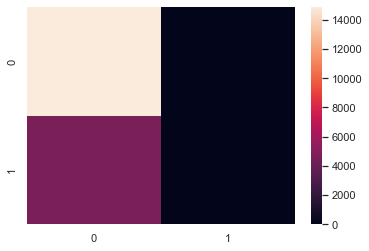

In [11]:
x = [ [adults['age'][i], adults['education-num'][i], adults['capital-gain'][i], 
       adults['income'][i]] for i in range(len(adults['income']))]

#print(x)

p = 0.6
n = len(x)
rets = divideSets(p, x)
list1 = rets[0] 
list2 = rets[1] 

# need to get the data in one array & the labels in another
data1 = [[[t[0], t[1], t[2]]] for t in list1]
labels1 = [t[3] for t in list1]
# print('\nData (List1):\n', data1)
# print('\nLabels (List1):\n', labels1)

data2 = [[[t[0], t[1], t[2]]] for t in list1]
labels2 = [t[3] for t in list1]
# print('\nData (List2):\n', data2)
# print('\nLabels (List2):\n', labels2)

predictions_labels = []
for i in tqdm.tqdm(range(len(data2))):
    predictions_labels.append(clf2.predict(data2[i]))

# want predictions with their points
predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
#print(predictions)
print(f'\np = {p:1.1}')
cf2 = confusion_matrix(labels2, predictions_labels)
np.set_printoptions(threshold=np.inf)
print('Confusion Matrix: \n', cf2)

# heat map for confusion matrix
sns.set_theme()
sns.heatmap(cf2)

In [12]:
# probably a better idea to split the data etc.
clf2.fit(xs,ys)

explainer = shap.Explainer(clf2.predict, xs, feature_names=['age', 'education-num', 'capital-gain'])
shap_values2 = explainer(xs)

Exact explainer: 32562it [00:25, 761.61it/s]                            


In [13]:
print(shap_values2[1])

.values =
array([0., 0., 0.])

.base_values =
0.0

.data =
array([50, 13,  0])


In [14]:
fig = plt.gcf()
fig.set_size_inches(5,5,forward=True)
fig.set_dpi(100)

<Figure size 500x500 with 0 Axes>

In [17]:
# check for different shap values: shap_values[1], [10] etc
p = shap.plots.waterfall(shap_values2[1], show=False)
# shap.plots.waterfall(shap_values2[50])
# shap.plots.waterfall(shap_values2[100])
# shap.plots.waterfall(shap_values2[140])

ValueError: Image size of 523962x238 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 576x216 with 3 Axes>

In [18]:
shap.plots.force(shap_values2[50])

I cannot analyze the waterfall or force charts. :(